In [156]:

import numpy as np
import pandas as pd
import re
import xgboost as xgb
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()



%matplotlib inline

In [157]:
train_data = pd.read_json('India Hacks 2017/Hotstar/train_data.json',orient="index")
test_data = pd.read_json('India Hacks 2017/Hotstar/test_data.json',orient='index')


In [158]:
#set index
train_data.reset_index(level = 0, inplace = True)
train_data.rename(columns={'index':'ID'}, inplace=True)

test_data.reset_index(level = 0, inplace = True)
test_data.rename(columns={'index':'ID'}, inplace=True)

In [159]:
print ('Train data has {} rows and {} columns'.format(train_data.shape[0],train_data.shape[1]))
print ('test_data data has {} rows and {} columns'.format(test_data.shape[0],test_data.shape[1]))

Train data has 200000 rows and 7 columns
test_data data has 100000 rows and 6 columns


In [160]:
train_data[train_data.segment=="pos"].head(20)

,ID,cities,dow,genres,segment,titles,tod
12,train-100007,"gurgaon:3703,bangalore:6283,mumbai:132815","1:27096,3:29521,2:19751,5:32613,4:14633,7:20,6...","Drama:47986,Romance:21147,TalkShow:54,Family:7...",pos,"Naamkarann:697,Chandra Nandni:1099,Pardes Mein...","11:15355,10:90,13:20469,12:26603,15:20863,14:1..."
28,train-100021,navi mumbai:3902,4:3902,Action:3902,pos,D - Underworld Badshah:3902,"3:2283,4:1619"
35,train-100028,delhi:6445,"1:759,3:84,7:3710,6:1891","Drama:3165,Romance:25,Family:3254",pos,"Ye Hai Mohabbatein:25,MS Dhoni: The Untold Sto...","0:843,12:306,17:1585,22:47,23:3663"
45,train-100037,"delhi:8,tirupati:12693","1:4115,3:6253,2:322,6:2010","Drama:5,TalkShow:12677,Comedy:8,Reality:10",pos,"On Air With AIB:8,Star Screen Awards:10,Koffee...","15:280,17:1918,16:2798,18:1095,23:322,1:2713,0..."
47,train-100039,bangalore:25714,"1:7368,3:5125,2:3961,5:88,4:4129,6:5040","Drama:3809,Cricket:542,TalkShow:16455,Romance:...",pos,"Diana's deadly curse:133,Andaz Apna Apna:3870,...","11:4407,10:5121,13:345,12:2918,15:139,14:5,17:..."
48,train-10004,navi mumbai:19155,"1:2437,3:3099,2:2290,5:4078,4:7246","Drama:16254,Romance:2900",pos,"Naamkarann:1182,Yeh Rishta Kya Kehlata Hai:402...","11:1885,10:1259,12:1352,15:5,14:2598,17:3418,1..."
91,train-100079,paris:188,1:188,TalkShow:188,pos,Koffee With Karan:188,12:188
93,train-100080,bangalore:6133,3:6133,"Romance:2420,Family:3713",pos,"Pardes Mein Hai Mera Dil:2420,Ishqbaaaz:3713","19:2401,20:1312,21:1039,22:1381"
104,train-100090,navi mumbai:273,6:272,"Drama:129,Awards:143",pos,"Neeli:129,Filmfare Awards South-Kannada:143",11:272
113,train-100099,"Unknown:39359,mumbai:53408","1:22488,2:65,5:13822,4:11503,7:21355,6:23527","Drama:73894,Family:11683,TalkShow:346,Romance:...",pos,"Naamkarann:5118,The Space Between Us:11,Chandr...","13:5121,12:5,15:6031,17:16092,22:694,23:5775,1..."


In [161]:
train_data[train_data.segment=="neg"].head(40)

,ID,cities,dow,genres,segment,titles,tod
0,train-1,"gurgaon:55494,delhi:31892","1:3412,3:15878,2:1737,5:10975,4:20974,7:17820,...","Cricket:82379,Kabaddi:255,Reality:4751",neg,"Top Raids: Haryana vs Services SCB:103,Day 4: ...","10:26,13:331,12:323,20:21864,21:16233,17:7953,..."
1,train-10,"delhi:5862,nagar:8916,mumbai:1593","1:5745,3:3025,2:3346,5:123,4:3007,7:1108,6:10","Cricket:15640,Wildlife:730",neg,"Dhoni Quits Captaincy:148,Day 4: India Move in...","11:1661,10:384,20:401,21:798,22:221,16:525,19:..."
2,train-100,navi mumbai:4142,3:4142,"LiveTV:13,Football:4129",neg,"Star Sports 4:13,Manchester United vs Everton:...","1:1207,0:2406,2:529"
3,train-1000,"new delhi:4131,chennai:2878,navi mumbai:1339","1:658,3:5867,5:413,4:1339,7:71","TalkShow:658,Cricket:7690",neg,"SRH vs RCB:701,KKR vs KXIP:1042,MI vs SRH:2288...","11:71,20:2417,21:1042,23:2288,19:1872,8:658"
4,train-10000,"gurgaon:6077,chennai:4055","1:1641,2:480,4:1445,7:1663,6:4900","Drama:5503,Cricket:3283,Reality:1345",neg,"MI vs KKR:304,Yeh Rishta Kya Kehlata Hai:5449,...","20:158,22:4139,17:67,23:1510,19:288,18:56,0:23..."
5,train-100000,"hyderabad:998,bangalore:2748,gulbarga:43317,be...","1:6707,3:1948,2:3574,5:8525,4:18938,7:8295,6:7344","Action:998,Drama:8795,Cricket:45541",neg,"India vs Australia 2nd Test English:2836,SRH v...","11:3450,10:1243,13:4420,12:4210,20:7050,21:770..."
6,train-100001,navi mumbai:10155,"1:1575,3:5330,2:1242,4:2007","Action:963,TalkShow:18,Romance:1357,Mythology:...",neg,"Jodi:7222,Maapillai:1357,Mahabharatham:594,Ban...","11:20,12:574,21:1357,22:1066,23:2290,0:4847"
7,train-100002,"delhi:1571,navi mumbai:12729","1:333,2:2233,5:739,4:268,7:10727","Drama:4344,Cricket:9956",neg,"Chandra Nandni:4344,India vs England 2nd T20I ...","11:242,15:419,14:1877,22:309,19:3063,18:64,1:2..."
8,train-100003,delhi:1318,"2:34,5:1074,7:210","Cricket:1248,Comedy:70",neg,"India vs Bangladesh Day 2 English:1066,Fielder...","10:844,20:65,17:69,23:78,19:40,9:222"
9,train-100004,"chandigarh:2214,delhi:3829,mumbai:9465","5:14,4:14292,7:1201","Action:86,Drama:4826,Cricket:10557,Kids:24,Tal...",neg,"The Jungle Book:24,Jolly LLB:4826,Escape Plan:...","11:1,13:1610,12:2626,20:2325,21:2985,17:1252,1..."


In [162]:
test_data.head()

,ID,cities,dow,genres,titles,tod
0,test-1,"delhi:182,mumbai:702","2:182,4:701","Romance:182,Cricket:702","Axar's 21-ball 40 amidst KXIP ruins:72,Virat K...","13:182,15:701"
1,test-10,"pune:16,delhi:1100,navi mumbai:22736","1:4830,3:3078,2:8359,5:2946,4:4185,7:451","Romance:50,Action:3501,Mythology:20300","Besh Korechi Prem Korechi:0,Power:122,Siya Ke ...","20:6909,21:1520,22:662,23:3160,19:5711,1:121,0..."
2,test-100,"chennai:8652,delhi:751,mumbai:4470","1:5409,2:740,4:1162,7:2755,6:3807","TalkShow:2247,Mythology:11626","Mahabharat:11626,Koffee With Karan:2247","11:23,10:499,13:1804,12:1467,15:751,14:14,22:3..."
3,test-1000,"pune:15,delhi:4872,mumbai:1849","1:3227,3:2043,7:1464","Drama:6459,Reality:276","Dance +:276,Dance :0,Chandanamazha:6458,Karut...","14:15,17:1758,16:4185,19:128,23:468,6:180"
4,test-10000,mumbai:1204,1:1204,Drama:1204,Yeh Rishta Kya Kehlata Hai:1204,19:1204


In [163]:
#Encode Target Variable
train_data = train_data.replace({'segment':{'pos':1,'neg':0}})


In [164]:







#check target variable count
train_data['segment'].value_counts()/train_data.shape[0]

0    0.923725
1    0.076275
Name: segment, dtype: float64

In [165]:
n = train_data.shape
target = train_data['segment']
train_data.drop('segment',axis=1, inplace=True)


target.value_counts()

0    184745
1     15255
Name: segment, dtype: int64

In [166]:
data = train_data

train_data = data.append(test_data).reset_index(drop=True)

In [167]:
train_data.shape

(300000, 6)

## Creating separate columns for genres and dow variables


### train data

In [168]:
train_data['g1'] = [re.sub(pattern='\:\d+',repl='',string=x) for x in train_data['genres']]
train_data['g1'] = train_data['g1'].apply(lambda x: x.split(','))

train_data['g2'] = [re.sub(pattern='\:\d+', repl='', string = x) for x in train_data['dow']]
train_data['g2'] = train_data['g2'].apply(lambda x: x.split(','))

train_data['g3'] = [re.sub(pattern='\:\d+', repl='', string = x) for x in train_data['tod']]
train_data['g3'] = train_data['g3'].apply(lambda x: x.split(','))

train_data['g4'] = [re.sub(pattern='\:\d+', repl='', string = x) for x in train_data['cities']]
train_data['g4'] = train_data['g4'].apply(lambda x: x.split(','))

t1 = pd.Series(train_data['g1']).apply(frozenset).to_frame(name='t_genre')
t2 = pd.Series(train_data['g2']).apply(frozenset).to_frame(name='t_dow')
t3 = pd.Series(train_data['g3']).apply(frozenset).to_frame(name='t_tod')
t4 = pd.Series(train_data['g4']).apply(frozenset).to_frame(name='t_cities')


In [169]:
t4.head()

,t_cities
0,"(gurgaon, delhi)"
1,"(mumbai, delhi, nagar)"
2,(navi mumbai)
3,"(new delhi, chennai, navi mumbai)"
4,"(gurgaon, chennai)"


In [170]:
# using frozenset trick - might take few minutes to process
for t_genre in frozenset.union(*t1.t_genre):
    t1[t_genre] = t1.apply(lambda _: int(t_genre in _.t_genre), axis=1)


In [171]:
for t_dow in frozenset.union(*t2.t_dow):
    t2[t_dow] = t2.apply(lambda _: int(t_dow in _.t_dow), axis = 1)


In [172]:
for t_tod in frozenset.union(*t3.t_tod):
    t3[t_tod] = t3.apply(lambda _: int(t_tod in _.t_tod), axis = 1)


In [173]:
t4.t_cities[0:10]

0                               (gurgaon, delhi)
1                         (mumbai, delhi, nagar)
2                                  (navi mumbai)
3              (new delhi, chennai, navi mumbai)
4                             (gurgaon, chennai)
5    (bangalore, gulbarga, bengaluru, hyderabad)
6                                  (navi mumbai)
7                           (navi mumbai, delhi)
8                                        (delhi)
9                    (mumbai, delhi, chandigarh)
Name: t_cities, dtype: object

In [174]:
for t_cities in frozenset.union(*t4.t_cities[1:2000]):
    t4[t_cities] = t4.apply(lambda _: int(t_cities in _.t_cities), axis = 1)


In [175]:

train_data = pd.concat([train_data.reset_index(drop=True), t1], axis=1)
train_data = pd.concat([train_data.reset_index(drop=True), t2], axis=1)
train_data["week_1"] = train_data["1"]
train_data["week_2"] = train_data["2"]
train_data["week_3"] = train_data["3"]
train_data["week_4"] = train_data["4"]
train_data["week_5"] = train_data["5"]
train_data["week_6"] = train_data["6"]
train_data["week_7"] = train_data["7"]

train_data.drop(["1","2","3","4","5","6","7"],axis = 1,inplace=True)

train_data = pd.concat([train_data.reset_index(drop=True), t3], axis=1)
train_data = pd.concat([train_data.reset_index(drop=True), t4], axis=1)



In [176]:
train_data.describe()


,Kabaddi,Reality,Romance,Family,Horror,Kids,Boxing,Teen,Mythology,Table Tennis,...,udupi,guwahati,domlur,savona,mumbai,khammam,ar riya,naihati,thane,srinagar
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.004527,0.287853,0.355293,0.221563,0.033283,0.024547,0.000137,0.010457,0.063033,0.001077,...,0.000020,0.000247,0.000357,0.000010,0.292390,0.000027,0.002283,0.001123,0.002817,0.003030
std,0.067128,0.452763,0.478603,0.415299,0.179376,0.154739,0.011690,0.101722,0.243023,0.032795,...,0.004472,0.015704,0.018882,0.003162,0.454861,0.005164,0.047730,0.033497,0.052998,0.054962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [177]:
train_data.shape

(300000, 220)

In [178]:
train_data.to_csv("data_2000_cities.csv")

# sum of watch time from titles

In [179]:

#the rows aren't list exactly. They are object, so we convert them to list and extract the watch time
w1 = train_data['titles']
w1 = w1.str.split(',')



In [180]:
#create a nested list of numbers
main = []
for i in np.arange(train_data.shape[0]):
    d1 = w1[i]
    nest = []
    nest = [re.sub(pattern = '.*\:', repl=' ', string= d1[k]) for k in list(np.arange(len(d1)))]
    main.append(nest)


## Turns out, there are blank values in the list, we need to fix them before we could add
## Fixing blanks in the list now


In [181]:
blanks = []
for i in np.arange(len(main)):
    if '' in main[i]:
        blanks.append(i)
        
#replacing blanks with 0
for i in blanks:
    main[i] = [x.replace('','0') for x in main[i]]
    
#converting string to integers
main = [[int(y) for y in x] for x in main]

#adding the watch time
tosum = []
for i in np.arange(len(main)):
    s = sum(main[i])
    tosum.append(s)

In [182]:
train_data['title_sum'] = tosum


In [183]:
#making changes in test data
w1_te = test_data['titles']
w1_te = w1_te.str.split(',')


In [184]:
main_te = []
for i in np.arange(test_data.shape[0]):
    d1 = w1_te[i]
    nest = []
    nest = [re.sub(pattern = '.*\:', repl=' ', string= d1[k]) for k in list(np.arange(len(d1)))]
    main_te.append(nest)


In [185]:
blanks_te = []
for i in np.arange(len(main_te)):
    if '' in main_te[i]:
        blanks_te.append(i)
        
#replacing blanks with 0
for i in blanks_te:
    main_te[i] = [x.replace('','0') for x in main_te[i]]
    
#converting string to integers
main_te = [[int(y) for y in x] for x in main_te]

#adding the watch time
tosum_te = []
for i in np.arange(len(main_te)):
    s = sum(main_te[i])
    tosum_te.append(s)

In [186]:
test_data['title_sum'] = tosum_te


## create count variables


In [187]:
#count variables
def wcount(p):
    return p.count(',')+1


In [188]:
train_data['title_count'] = train_data['titles'].map(wcount)
train_data['genres_count'] = train_data['genres'].map(wcount)
train_data['cities_count'] = train_data['cities'].map(wcount)
train_data['tod_count'] = train_data['tod'].map(wcount)
train_data['dow_count'] = train_data['dow'].map(wcount)
train_data['cities_count'] = train_data['cities'].map(wcount)


test_data['title_count'] = test_data['titles'].map(wcount)
test_data['genres_count'] = test_data['genres'].map(wcount)
test_data['cities_count'] = test_data['cities'].map(wcount)
test_data['tod_count'] = test_data['tod'].map(wcount)
test_data['dow_count'] = test_data['dow'].map(wcount)
test_data['cities_count'] = test_data['cities'].map(wcount)


## Let's see

In [189]:
train_data.head(10)

,ID,cities,dow,genres,titles,tod,g1,g2,g3,g4,...,ar riya,naihati,thane,srinagar,title_sum,title_count,genres_count,cities_count,tod_count,dow_count
0,train-1,"gurgaon:55494,delhi:31892","1:3412,3:15878,2:1737,5:10975,4:20974,7:17820,...","Cricket:82379,Kabaddi:255,Reality:4751","Top Raids: Haryana vs Services SCB:103,Day 4: ...","10:26,13:331,12:323,20:21864,21:16233,17:7953,...","[Cricket, Kabaddi, Reality]","[1, 3, 2, 5, 4, 7, 6]","[10, 13, 12, 20, 21, 17, 16, 19, 18, 22, 2, 14...","[gurgaon, delhi]",...,0,0,0,0,87363,60,3,2,14,7
1,train-10,"delhi:5862,nagar:8916,mumbai:1593","1:5745,3:3025,2:3346,5:123,4:3007,7:1108,6:10","Cricket:15640,Wildlife:730","Dhoni Quits Captaincy:148,Day 4: India Move in...","11:1661,10:384,20:401,21:798,22:221,16:525,19:...","[Cricket, Wildlife]","[1, 3, 2, 5, 4, 7, 6]","[11, 10, 20, 21, 22, 16, 19, 18, 23, 1, 3, 2, ...","[delhi, nagar, mumbai]",...,0,0,0,0,16356,70,2,3,16,7
2,train-100,navi mumbai:4142,3:4142,"LiveTV:13,Football:4129","Star Sports 4:13,Manchester United vs Everton:...","1:1207,0:2406,2:529","[LiveTV, Football]",[3],"[1, 0, 2]",[navi mumbai],...,0,0,0,0,4142,2,2,1,3,1
3,train-1000,"new delhi:4131,chennai:2878,navi mumbai:1339","1:658,3:5867,5:413,4:1339,7:71","TalkShow:658,Cricket:7690","SRH vs RCB:701,KKR vs KXIP:1042,MI vs SRH:2288...","11:71,20:2417,21:1042,23:2288,19:1872,8:658","[TalkShow, Cricket]","[1, 3, 5, 4, 7]","[11, 20, 21, 23, 19, 8]","[new delhi, chennai, navi mumbai]",...,0,0,0,0,8348,8,2,3,6,5
4,train-10000,"gurgaon:6077,chennai:4055","1:1641,2:480,4:1445,7:1663,6:4900","Drama:5503,Cricket:3283,Reality:1345","MI vs KKR:304,Yeh Rishta Kya Kehlata Hai:5449,...","20:158,22:4139,17:67,23:1510,19:288,18:56,0:23...","[Drama, Cricket, Reality]","[1, 2, 4, 7, 6]","[20, 22, 17, 23, 19, 18, 0, 15, 21]","[gurgaon, chennai]",...,0,0,0,0,10129,11,3,2,9,5
5,train-100000,"hyderabad:998,bangalore:2748,gulbarga:43317,be...","1:6707,3:1948,2:3574,5:8525,4:18938,7:8295,6:7344","Action:998,Drama:8795,Cricket:45541","India vs Australia 2nd Test English:2836,SRH v...","11:3450,10:1243,13:4420,12:4210,20:7050,21:770...","[Action, Drama, Cricket]","[1, 3, 2, 5, 4, 7, 6]","[11, 10, 13, 12, 20, 21, 22, 23, 19, 18, 16, 1...","[hyderabad, bangalore, gulbarga, bengaluru]",...,0,0,0,0,55324,39,3,4,17,7
6,train-100001,navi mumbai:10155,"1:1575,3:5330,2:1242,4:2007","Action:963,TalkShow:18,Romance:1357,Mythology:...","Jodi:7222,Maapillai:1357,Mahabharatham:594,Ban...","11:20,12:574,21:1357,22:1066,23:2290,0:4847","[Action, TalkShow, Romance, Mythology, Reality]","[1, 3, 2, 4]","[11, 12, 21, 22, 23, 0]",[navi mumbai],...,0,0,0,0,10154,5,5,1,6,4
7,train-100002,"delhi:1571,navi mumbai:12729","1:333,2:2233,5:739,4:268,7:10727","Drama:4344,Cricket:9956","Chandra Nandni:4344,India vs England 2nd T20I ...","11:242,15:419,14:1877,22:309,19:3063,18:64,1:2...","[Drama, Cricket]","[1, 2, 5, 4, 7]","[11, 15, 14, 22, 19, 18, 1, 0, 20, 21]","[delhi, navi mumbai]",...,0,0,0,0,14300,7,2,2,10,5
8,train-100003,delhi:1318,"2:34,5:1074,7:210","Cricket:1248,Comedy:70","India vs Bangladesh Day 2 English:1066,Fielder...","10:844,20:65,17:69,23:78,19:40,9:222","[Cricket, Comedy]","[2, 5, 7]","[10, 20, 17, 23, 19, 9]",[delhi],...,0,0,0,0,1318,6,2,1,6,3
9,train-100004,"chandigarh:2214,delhi:3829,mumbai:9465","5:14,4:14292,7:1201","Action:86,Drama:4826,Cricket:10557,Kids:24,Tal...","The Jungle Book:24,Jolly LLB:4826,Escape Plan:...","11:1,13:1610,12:2626,20:2325,21:2985,17:1252,1...","[Action, Drama, Cricket, Kids, TalkShow]","[5, 4, 7]","[11, 13, 12, 20, 21, 17, 16, 19, 18, 23, 14]","[chandigarh, delhi, mumbai]",...,0,0,0,0,15507,7,5,3,11,3


In [190]:
train_data.columns

Index(['ID', 'cities', 'dow', 'genres', 'titles', 'tod', 'g1', 'g2', 'g3',
       'g4',
       ...
       'ar riya', 'naihati', 'thane', 'srinagar', 'title_sum', 'title_count',
       'genres_count', 'cities_count', 'tod_count', 'dow_count'],
      dtype='object', length=226)

## EDA

In [191]:
train_data.tod_count.head()

0    14
1    16
2     3
3     6
4     9
Name: tod_count, dtype: int64

In [192]:
train_data[train_data.segment==1].cities_count.hist()


AttributeError: 'DataFrame' object has no attribute 'segment'

In [ ]:
train_data[train_data.segment==0].cities_count.hist()


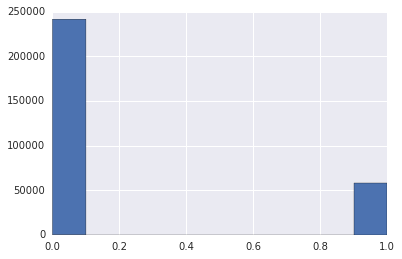

In [193]:
train_data['1'].hist()


## Word occourences

In [194]:
#train_data["vs"] = train_data.titles.apply(lambda x: x.contains(r'vs').sum())
#test_data["vs"] = test_data.titles.apply(lambda x: x.contains(r'vs').sum())

train_data["vs"] = train_data.titles.apply(lambda x: str.count(x, 'vs'))
test_data["vs"] = test_data.titles.apply(lambda x: str.count(x, 'vs'))

#train_data["s"] = train_data.titles.apply(lambda x: str.count(x, "'s"))
#test_data["s"] = test_data.titles.apply(lambda x: str.count(x, "'s"))

train_data["ipl"] = train_data.titles.apply(lambda x: str.count(x, "IPL"))
test_data["ipl"] = test_data.titles.apply(lambda x: str.count(x, "IPL"))

#train_data["Win"] = train_data.titles.apply(lambda x: str.count(x, "Win"))
#test_data["Win"] = test_data.titles.apply(lambda x: str.count(x, "Win"))


In [195]:
train_data["vs"].head(10)

0    28
1     3
2     1
3     5
4     6
5    18
6     0
7     3
8     3
9     2
Name: vs, dtype: int64

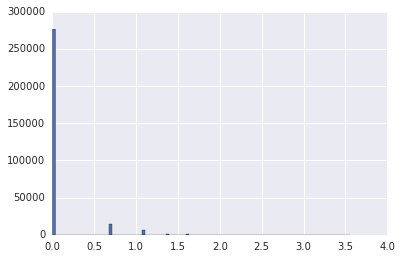

In [237]:
np.log(train_data["ipl"]+1).hist(bins=100)

In [197]:
#train_data["Win"].hist(bins=100)

In [198]:
train_data["ipl"].describe()

count    300000.000000
mean          0.126247
std           0.545566
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: ipl, dtype: float64

In [199]:
train_data.titles[50]

'Koffee With Karan:10'

In [200]:
plt.scatter(train_data.vs,train_data.segment)

AttributeError: 'DataFrame' object has no attribute 'segment'

In [201]:
plt.scatter(train_data.ipl,train_data.segment)

AttributeError: 'DataFrame' object has no attribute 'segment'

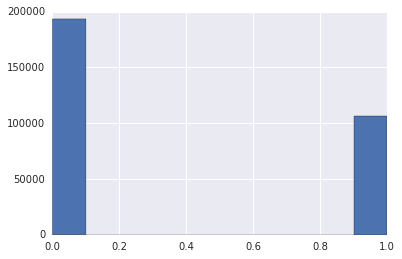

In [238]:
train_data.Romance.hist()

## remove variables


In [203]:
test_id = test_data['ID']
train_data.drop(['ID','cities','dow','genres','titles','tod','g1','g2','g3','g4','t_genre','t_dow','t_tod','t_cities'], inplace=True, axis=1)
#test_data.drop(['ID','cities','dow','genres','titles','tod','g1','g2','g3','g4','t_genre','t_dow','t_tod','t_cities'], inplace=True, axis=1)


In [204]:
train_data.head(20)

,Kabaddi,Reality,Romance,Family,Horror,Kids,Boxing,Teen,Mythology,Table Tennis,...,thane,srinagar,title_sum,title_count,genres_count,cities_count,tod_count,dow_count,vs,ipl
0,1,1,0,0,0,0,0,0,0,0,...,0,0,87363,60,3,2,14,7,28,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,16356,70,2,3,16,7,3,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,4142,2,2,1,3,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,8348,8,2,3,6,5,5,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,10129,11,3,2,9,5,6,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,55324,39,3,4,17,7,18,0
6,0,1,1,0,0,0,0,0,1,0,...,0,0,10154,5,5,1,6,4,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,14300,7,2,2,10,5,3,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1318,6,2,1,6,3,3,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,15507,7,5,3,11,3,2,0


In [205]:
target = train_data['segment']
train_data.drop('segment',axis=1, inplace=True)


target.value_counts()

KeyError: 'segment'

In [206]:
target.head

<bound method Series.head of 0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        1
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        1
29        0
         ..
199970    0
199971    0
199972    0
199973    0
199974    0
199975    0
199976    0
199977    0
199978    0
199979    1
199980    0
199981    0
199982    0
199983    0
199984    0
199985    0
199986    0
199987    0
199988    0
199989    0
199990    0
199991    0
199992    0
199993    1
199994    0
199995    0
199996    0
199997    0
199998    0
199999    0
Name: segment, dtype: int64>

In [207]:
train_data.shape

(300000, 214)

In [208]:
test_data.shape

(100000, 14)

In [209]:
train_data.columns

Index(['Kabaddi', 'Reality', 'Romance', 'Family', 'Horror', 'Kids', 'Boxing',
       'Teen', 'Mythology', 'Table Tennis',
       ...
       'thane', 'srinagar', 'title_sum', 'title_count', 'genres_count',
       'cities_count', 'tod_count', 'dow_count', 'vs', 'ipl'],
      dtype='object', length=214)

In [210]:
train_data.shape

(300000, 214)

In [211]:
test_data.columns

Index(['ID', 'cities', 'dow', 'genres', 'titles', 'tod', 'title_sum',
       'title_count', 'genres_count', 'cities_count', 'tod_count', 'dow_count',
       'vs', 'ipl'],
      dtype='object')

In [212]:
test_data.shape

(100000, 14)

In [213]:
#train_data.loc[:,train_data.columns.tolist() not in test_data.columns.tolist()].head()

In [214]:
train_data.columns.tolist()[train_data.columns.tolist() not in test_data.columns.tolist()]

'Reality'

In [215]:
test_data.columns.tolist()[test_data.columns.tolist() not in test_data.columns.tolist()]

'cities'

In [216]:
#train_data.drop(['paris', 'noida', 'jaipur', 'tirupati', 'gazipur', 'bhopal', 'dubayy', 'rawalpindi', 'gulbarga', 'nagari', 'secunderabad', 'jakarta', 'kukatpally', 'ad dawhah', 'al-manamah', 'surat', 'krishnarajapura', 'thiruvananthapuram', 'mangalore', 'prabhadevi', 'al kuwayt', 'vadodara', 'jacksonville', 'lahore', 'bulandshahr'], inplace=True, axis=1)
#test_data.drop(['paris', 'noida', 'jaipur', 'tirupati', 'gazipur', 'bhopal', 'dubayy', 'rawalpindi', 'gulbarga', 'nagari', 'secunderabad', 'jakarta', 'kukatpally', 'ad dawhah', 'al-manamah', 'surat', 'krishnarajapura', 'thiruvananthapuram', 'mangalore', 'prabhadevi', 'al kuwayt', 'vadodara', 'jacksonville', 'lahore', 'bulandshahr'], inplace=True, axis=1)

#train_data.drop(['Science'], inplace=True, axis=1)
#test_data.drop(['Science'], inplace=True, axis=1)


In [217]:
#train_data2 = train_data
#test_data2 = test_data

#train_data = train_data2
#test_data = test_data2

In [218]:


#train_data=train_data.values
#test_data=test_data.values

#test_data.columns = train_data.columns

In [219]:
train = train_data.loc[:n[0]-1,:]
test = train_data.loc[n[0]:,:]

In [234]:
train.shape

(200000, 195)

In [235]:
test.shape

(100000, 195)

In [233]:
train.drop(['siliguri', 'dombivli', 'NA', 'vapi', 'amsterdam', 'frankfurt am main', 'las vegas', 'milano', 'anandnagar', 'petaling jaya', 
'colombo', 'faridabad', 'albany', 'sydney', 'nashik', 'peshawar', 'stuttgart', 'patiala', 'patiala', 'guwahati'], axis =1, inplace = True)

test.drop(['siliguri', 'dombivli', 'NA', 'vapi', 'amsterdam', 'frankfurt am main', 'las vegas', 'milano', 'anandnagar', 'petaling jaya', 
'colombo', 'faridabad', 'albany', 'sydney', 'nashik', 'peshawar', 'stuttgart', 'patiala', 'patiala', 'guwahati'], axis =1, inplace = True)


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [239]:
train.ipl = np.log(1+train.ipl)
train.vs = np.log(1+train.vs)

test.ipl = np.log(1+test.ipl)
test.vs = np.log(1+test.vs)


/usr/local/lib/python3.4/dist-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value



# training data


In [240]:
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=321, num_rounds=10000):
    param = {}
    param['objective'] = 'binary:logistic'
    param['eta'] = 0.01
    param['max_depth'] = 8
    param['silent'] = 1
    param['lambda'] = 10    
    param['eval_metric'] = "auc"
    param['min_child_weight'] = 1
    param['nthread'] = 16 
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval = 100)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest)
    return pred_test_y, model



In [241]:
tr = pd.read_json('India Hacks 2017/Hotstar/train_data.json',orient="index")

tr = tr.replace({'segment':{'pos':1,'neg':0}})

target = tr['segment']


target.head(20)

train-1         0
train-10        0
train-100       0
train-1000      0
train-10000     0
train-100000    0
train-100001    0
train-100002    0
train-100003    0
train-100004    0
train-100005    0
train-100006    0
train-100007    1
train-100008    0
train-100009    0
train-10001     0
train-100010    0
train-100011    0
train-100012    0
train-100013    0
Name: segment, dtype: int64

In [242]:
from sklearn import model_selection, preprocessing, ensemble

cv_scores = []
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
for dev_index, val_index in kf.split(range(train.shape[0])):
        dev_X, val_X = train.loc[dev_index,:], train.loc[val_index,:]
        dev_Y, val_Y = target[dev_index], target[val_index]
        preds, model = runXGB(dev_X, dev_Y, val_X, val_Y)
#        cv_scores.append(log_loss(val_Y, preds))
#        print(cv_scores)
        break

[0]	train-auc:0.771252	test-auc:0.770648
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[100]	train-auc:0.809464	test-auc:0.803041
[200]	train-auc:0.818367	test-auc:0.807307
[300]	train-auc:0.826095	test-auc:0.810666
[400]	train-auc:0.832392	test-auc:0.812737
[500]	train-auc:0.837837	test-auc:0.81414
[600]	train-auc:0.842167	test-auc:0.814938
[700]	train-auc:0.84567	test-auc:0.81549
[800]	train-auc:0.848602	test-auc:0.815893
[900]	train-auc:0.851485	test-auc:0.816039
[1000]	train-auc:0.854157	test-auc:0.816129
[1100]	train-auc:0.856845	test-auc:0.816203
[1200]	train-auc:0.859295	test-auc:0.816218
Stopping. Best iteration:
[1150]	train-auc:0.857992	test-auc:0.816236



In [226]:
#[593]	train-auc:0.844575	test-auc:0.805021, LB: 0.79529
#with "vs" count:
#[511]	train-auc:0.845387	test-auc:0.810365, LB: 0.80308
#with "vs" and "'s" count (lambda = 50):
#[1107]	train-auc:0.829788	test-auc:0.810833, LB: 0.80255
#with "vs" and "'s" count (lambda = 10):
#[910]	train-auc:0.840914	test-auc:0.810716, LB: 0.80214
#with "vs" and "ipl" count (lambda = 10):
#[802]	train-auc:0.83779	test-auc:0.810799, LB: 0.80376
#with "vs" and "ipl" count and tod's (lambda = 10):
#[852]	train-auc:0.847635	test-auc:0.811131, LB: 0.80398
#With 1000 cities
#[1114]	train-auc:0.857395	test-auc:0.816483 LB: 0.80954
#[974]	train-auc:0.853322	test-auc:0.816201 LB: 0.80959
preds, model = runXGB(train, target, test, num_rounds=974)


In [228]:
preds[1:10]

array([ 0.05716499,  0.23778757,  0.19725336,  0.14160343,  0.05697566,
        0.0152957 ,  0.05676546,  0.0051173 ,  0.02235965], dtype=float32)

In [227]:
np.array(model.get_fscore().items())



array(dict_items([('ad dawhah', 48), ('10', 963), ('bangkok', 13), ('vs', 3924), ('Unknown', 1094), ('delhi', 1482), ('siliguri', 16), ('hyderabad', 1549), ('dombivli', 1), ('kanpur', 26), ('Romance', 1753), ('dow_count', 2420), ('NA', 4), ('lahore', 99), ('Awards', 807), ('Mythology', 1065), ('vapi', 28), ('kathmandu', 55), ('amsterdam', 14), ('tirupati', 73), ('mangalore', 138), ('week_5', 811), ('gurgaon', 906), ('frankfurt am main', 15), ('Teen', 536), ('chandigarh', 340), ('13', 932), ('6', 825), ('las vegas', 13), ('milano', 2), ('anandnagar', 8), ('Tennis', 52), ('Travel', 396), ('petaling jaya', 4), ('week_7', 947), ('cities_count', 4221), ('bhopal', 488), ('nagari', 116), ('colombo', 25), ('15', 943), ('week_2', 774), ('Thriller', 1015), ('bangalore', 1390), ('7', 1142), ('karachi', 433), ('Kabaddi', 176), ('prabhadevi', 271), ('8', 1000), ('al kuwayt', 29), ('16', 910), ('dubayy', 222), ('faridabad', 6), ('Athletics', 53), ('tod_count', 6364), ('Crime', 1247), ('new delhi', 1

In [142]:
fi = pd.DataFrame.from_dict(data = model.get_fscore().items())
#, orient =['feature','importance']).sort_values('importance', ascending=False)
#model.get_fscore().items().head()
fi.head()

#xgb.plot_importance(model)




ValueError: If using all scalar values, you must pass an index

In [100]:
from sklearn.feature_selection import SelectFromModel

# select features using threshold
selection = SelectFromModel(model, threshold=0.5, prefit=True)
select_X_train = selection.transform(train)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, target)
# eval model
select_X_test = selection.transform(test)
y_pred = selection_model.predict(select_X_test)

ValueError: The underlying estimator Booster has no `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to SelectFromModel or call fit before calling transform.

In [229]:
columns = ['segment']
out_df = pd.DataFrame(data=preds, columns=columns)

out_df['ID'] = test_id
out_df = out_df[['ID','segment']]



In [230]:
out_df.shape

(100000, 2)

In [231]:
out_df.to_csv("Hotstar_10.csv", index=False, encoding = 'ascii')
#out_df.to_csv("Hotstar_1.csv", index=False)

In [232]:
from IPython.display import FileLink, FileLinks
FileLink('Hotstar_10.csv')

/resources/Hotstar_10.csv

In [ ]:
xgb_params <- list(booster="gbtree",
                   objective="binary:logistic",
                   eval_metric="auc",
                   nthread=14,
                   eta = .5,
                   lambda = 5,
                   gamma = 1,
                   max_depth = 5,
                   min_child_weight = 1,
                   subsample = .8,
                   colsample_bytree = .5
)


set.seed(0)
res = xgb.cv(xgb_params,
             dtrain,
             nrounds=10000,
             nfold=10,
             early.stop.round=15,
             print.every.n = 10,
             verbose= 1,
             maximize=TRUE)


xgb2 <- xgb.train(data = dtrain,
                  params = xgb_params,
                  nrounds = 100)


model <- xgb.dump(xgb2, with.stats = T)
model[1:30] 
names <- dimnames(data.matrix(x_train[,-1]))[[2]]

importance_matrix <- xgb.importance(names, model = xgb2)

xgb.plot.importance(importance_matrix[1:20,])

pred_val<-predict(object = xgb2,dval)



In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split

target = train_data['segment']
train_data.drop('segment',axis=1, inplace=True)

## uncomment to do grid search - could get better score
# X_train, X_val, y_train, y_val = train_test_split(train_data, target, train_size=0.6, random_state = 1)

## doing grid search for parameters
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.grid_search import GridSearchCV
# from sklearn.metrics import roc_auc_score, make_scorer
# clf_scorer = make_scorer('roc_auc')
# rfc = RandomForestClassifier(n_estimators=100,oob_score=True,)
# param_grid = {
#     'max_depth':[4,8,12],
#     'max_features':['sqrt',10,15]
    
# }

# cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring=clf_scorer)
# cv_rfc.best_params_

#train final model


In [ ]:
rf_model = RandomForestClassifier(n_estimators=500,max_depth=12, max_features=10)
rf_model.fit(train_data, target)


In [ ]:
#make prediction
rf_pred = rf_model.predict_proba(test_data)



In [ ]:
#make submission file and submit
columns = ['segment']
sub = pd.DataFrame(data=rf_pred[:,1], columns=columns)
sub['ID'] = test_id
sub = sub[['ID','segment']]
sub.to_csv("sub_hot.csv", index=False)